In [2]:
import pandas as pd

In [3]:
availability_df = pd.read_csv("availability_dataset.csv")

In [4]:
availability_df

,timestamp,location_name,n_available,predicted
0,2023-06-01 00:00:00,BikeTown,102,100
1,2023-06-01 00:01:00,BikeTown,102,104
2,2023-06-01 00:02:00,BikeTown,102,101
3,2023-06-01 00:03:00,BikeTown,104,108
4,2023-06-01 00:04:00,BikeTown,102,103
...,...,...,...,...
927355,2023-08-31 23:55:00,VelocityVista,2,-2
927356,2023-08-31 23:56:00,VelocityVista,4,3
927357,2023-08-31 23:57:00,VelocityVista,4,6
927358,2023-08-31 23:58:00,VelocityVista,4,0


In [16]:
availability_df[availability_df["location_name"].isin(["BikeTown"])]

,timestamp,location_name,n_available,predicted
0,2023-06-01 00:00:00,BikeTown,102,100
1,2023-06-01 00:01:00,BikeTown,102,104
2,2023-06-01 00:02:00,BikeTown,102,101
3,2023-06-01 00:03:00,BikeTown,104,108
4,2023-06-01 00:04:00,BikeTown,102,103
...,...,...,...,...
132475,2023-08-31 23:55:00,BikeTown,4,8
132476,2023-08-31 23:56:00,BikeTown,7,7
132477,2023-08-31 23:57:00,BikeTown,7,5
132478,2023-08-31 23:58:00,BikeTown,6,1


In [14]:
pd.to_datetime("2023-06-01")

Timestamp('2023-06-01 00:00:00')

In [20]:
import datetime

availability_df["timestamp"] = pd.to_datetime(availability_df["timestamp"])

filtered_df = availability_df[
    (availability_df['timestamp'].dt.date >= datetime.date(2023,6,1)) & 
    (availability_df['timestamp'].dt.date <= datetime.date(2023,6,7)) & 
    (availability_df['location_name'].isin(["BikeTown", "VelocityVista"]))
]

filtered_df

,timestamp,location_name,n_available,predicted
0,2023-06-01 00:00:00,BikeTown,102,100
1,2023-06-01 00:01:00,BikeTown,102,104
2,2023-06-01 00:02:00,BikeTown,102,101
3,2023-06-01 00:03:00,BikeTown,104,108
4,2023-06-01 00:04:00,BikeTown,102,103
...,...,...,...,...
804955,2023-06-07 23:55:00,VelocityVista,0,-5
804956,2023-06-07 23:56:00,VelocityVista,1,4
804957,2023-06-07 23:57:00,VelocityVista,2,-1
804958,2023-06-07 23:58:00,VelocityVista,5,9


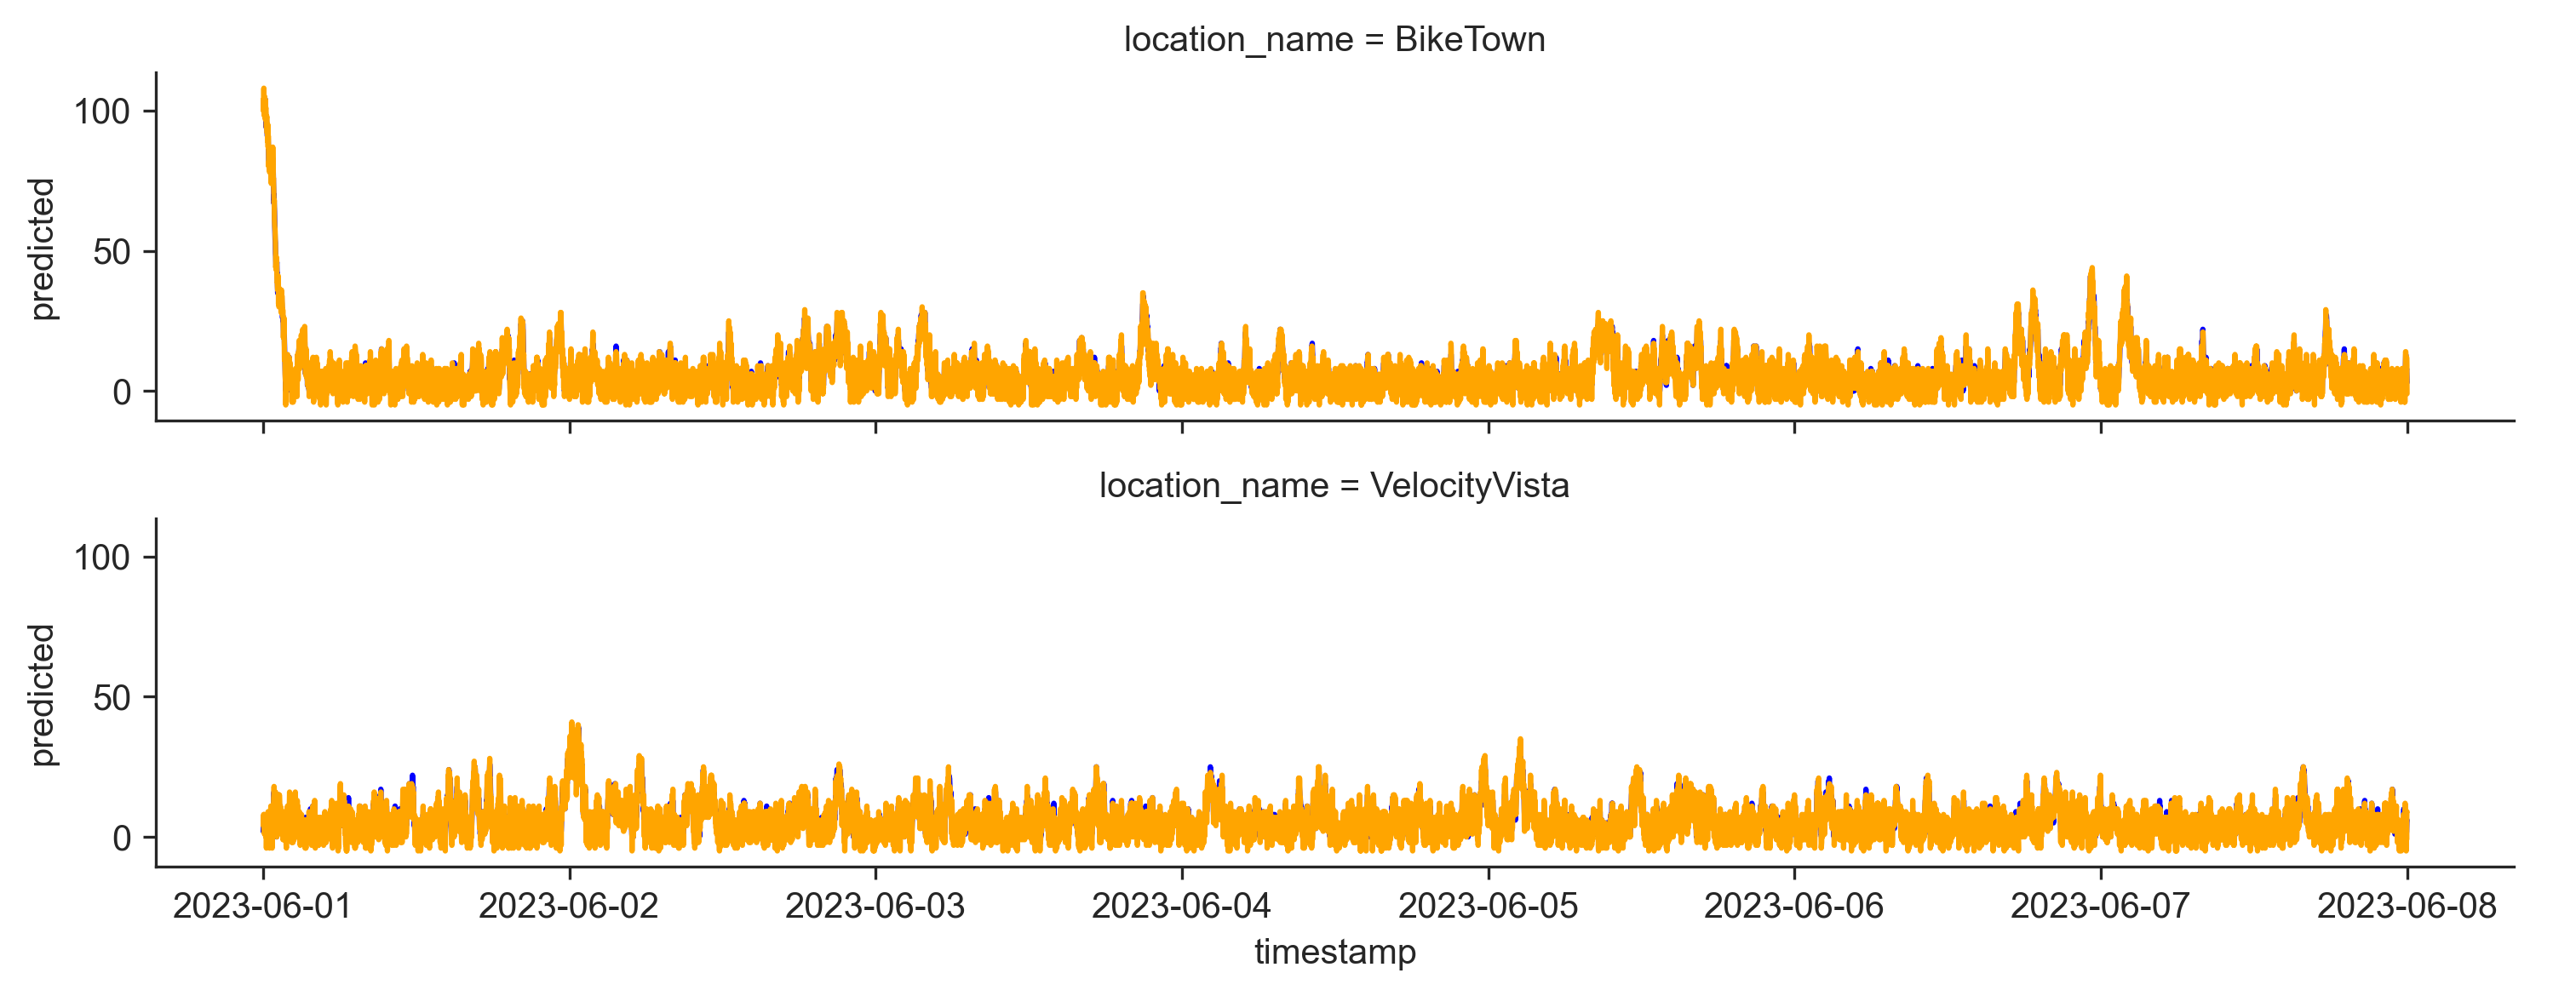

In [33]:
import seaborn as sns 
from matplotlib import pyplot as plt

sns.set_style("ticks")
plt.rcParams.update({"figure.dpi": 300})

g = sns.FacetGrid(filtered_df, row="location_name", aspect=5, height=2)
g.map(sns.lineplot, "timestamp", "n_available", color="blue")
g.map(sns.lineplot, "timestamp", "predicted", color="orange")
g.add_legend()

In [36]:
availability_df.melt(id_vars=['timestamp', 'location_name'], var_name='type')

,timestamp,location_name,type,value
0,2023-06-01 00:00:00,BikeTown,n_available,102
1,2023-06-01 00:01:00,BikeTown,n_available,102
2,2023-06-01 00:02:00,BikeTown,n_available,102
3,2023-06-01 00:03:00,BikeTown,n_available,104
4,2023-06-01 00:04:00,BikeTown,n_available,102
...,...,...,...,...
1854715,2023-08-31 23:55:00,VelocityVista,predicted,-2
1854716,2023-08-31 23:56:00,VelocityVista,predicted,3
1854717,2023-08-31 23:57:00,VelocityVista,predicted,6
1854718,2023-08-31 23:58:00,VelocityVista,predicted,0
